In [38]:
from obspy.taup import TauPyModel
from obspy.taup import plot_travel_times
from obspy.geodetics import degrees2kilometers
model = TauPyModel(model="ak135irelandcrust")
from obspy.geodetics import locations2degrees
import pandas as pd
import SeisBlast as sb
import matplotlib.pyplot as plt
import numpy as np
seisblast_files = '/home/bmelo/bin/SeisBlast/files'

In [2]:
stations = pd.read_csv(
    "/home/bmelo/bin/Quarry/James_files/Total_Stations_List.txt", 
    delimiter=' ',
    header = 0,
    names=['sta', 'name','lat', 'lon', 'elevation', 'net', 'end'])
uniq_blasts = pd.read_csv('/home/bmelo/bin/SeisBlast/files/uniq_quarry-station_list.csv')
uniq_blasts

,closest-ev_id,quarry-lat,quarry-lon,origin_time,mag,sta,closest-time,count
0,dias2013kwhe,54.3797,-7.378597,2013-06-04 11:58:42.744,1.29,"['D34', 'DL31', 'IDGL', 'UCRUI']","[13.873, 10.696, 13.043, 16.183]",5
1,dias2013kwks,52.8995,-9.038942,2013-06-04 13:45:39.377,1.56,"['IA002', 'IA009', 'IAD01', 'UCAR3', 'UD10', '...","[27.592, 18.393, 3.43, 12.756, 35.399, 24.536,...",5
2,dias2013kwle,53.4341,-7.138017,2013-06-04 14:00:17.523,1.18,['UCD11'],[10.823],5
3,dias2013kwlj,52.5985,-7.200083,2013-06-04 14:05:07.330,1.16,"['DSB', 'UHELL']","[15.376, 15.765]",5
4,dias2013kwls,53.3092,-9.007666,2013-06-04 14:16:21.183,1.71,"['DSB', 'IA009', 'IA013', 'IAD01', 'IGLA', 'UC...","[28.79, 10.624, 21.342, 10.326, 4.683, 10.139,...",5
...,...,...,...,...,...,...,...,...
1175,dias2014yqpq,54.8313,-6.050479,2014-12-17 14:56:14.298,1.26,['DL14'],[19.989],3
1176,dias2014ysgw,53.2730,-6.502024,2014-12-18 12:46:48.262,0.76,['ILTH'],[14.815],5
1177,dias2014yshe,54.2518,-6.586716,2014-12-18 12:55:53.479,0.99,['IA003'],[26.231],5
1178,dias2014yucm,54.5246,-8.088243,2014-12-19 12:50:04.704,1.09,"['DL13', 'DL24', 'IA009', 'IDGL', 'ILTH', 'UD0...","[14.473, 13.673, 15.818, 12.152, 22.142, 7.722...",5


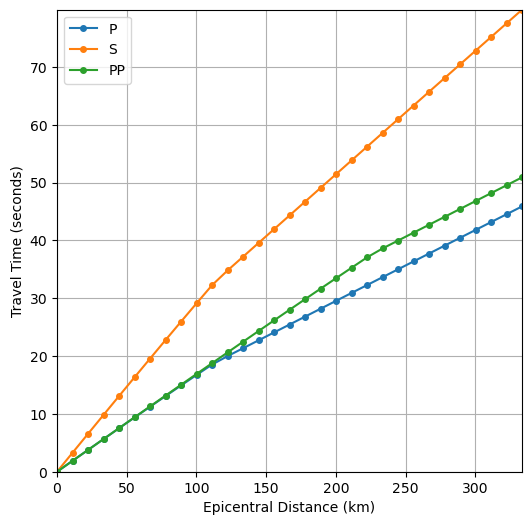

In [39]:
source_depth = 0
max_distance = 3  # in degrees

# Get travel times for specific phases
phases = ["P", "S", "PP"]
distances = []
times = {phase: [] for phase in phases}

for distance in range(0, int(max_distance * 10) + 1):  # finer steps for smooth plots
    dist_in_deg = distance / 10.0  # Convert steps to degrees
    arrivals = model.get_ray_paths(
        source_depth_in_km=source_depth, 
        distance_in_degree=dist_in_deg, 
        phase_list=phases
    )
    dist_in_km = degrees2kilometers(dist_in_deg)
    distances.append(dist_in_km)
    for phase in phases:
        phase_arrival = [a.time for a in arrivals if a.name == phase]
        if phase_arrival:
            times[phase].append(phase_arrival[0])
        else:
            times[phase].append(None)  # No arrival for this phase at this distance

# Plot manually
fig, ax = plt.subplots(figsize=(6, 6))
for phase, time_list in times.items():
    ax.plot(
        distances, 
        time_list, 
        label=phase, 
        marker='o', 
        linestyle='-', 
        markersize=4
    )

# Customise the plot
ax.set_xlim(0, degrees2kilometers(max_distance))
ax.set_ylim(0, max([max(t) for t in times.values() if t]))
ax.set_xlabel("Epicentral Distance (km)")
ax.set_ylabel("Travel Time (seconds)")
ax.legend()
ax.grid(True)
plt.show()


IA002
IA009
IAD01
UCAR3
UD10
UGAL1
VAL


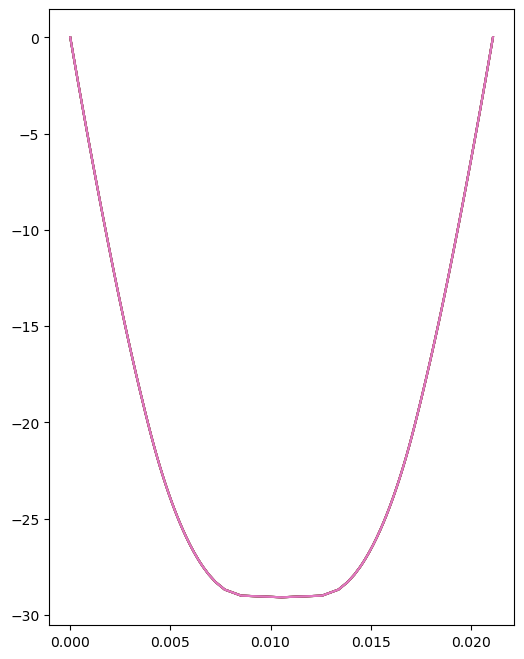

In [52]:
#calculate distances in deg
fig, ax = plt.subplots(figsize=(6, 8))
index_src = 1
#index_st = 0
ray_info = pd.DataFrame(columns=['src', 'dist', 'time'])
#for index_src in range(uniq_blasts.shape[0]):
for index_st in range(len(eval(uniq_blasts['sta'].iloc[index_src]))):
    st=eval(uniq_blasts['sta'].iloc[index_src])[index_st]
    station_info = stations[stations['name'] == st]
    q_lat = uniq_blasts['quarry-lat'][index_src]
    q_lon = uniq_blasts['quarry-lon'][index_src]
    st_elevation = -station_info['elevation'].item()
    dist = locations2degrees(q_lat, q_lon, station_info['lat'].item(), station_info['lon'].item())
    arrivals = model.get_ray_paths(
        0, #source depth
        dist, 
        ["P"], 
        0)
    arrival=arrivals[0]
    #arrival=np.vstack(arrival)
    if len(arrivals) > 0:
        print(st)
        ax.plot(a.path['dist'], -a.path['depth'])#, alpha=0.7)
        #ax = arrivals.plot_rays(plot_type="cartesian", legend=True)
    else:
        print(f"No valid ray paths found for station {st} at distance {dist} degrees.")
    
    
                    

In [ ]:

arrivals = model.get_ray_paths(source_depth_in_km=500,
                                distance_in_degree=130,
                                phase_list=["P"])
ax = arrivals.plot_rays(plot_type="cartesian")